# Establish the target
- Establish the target for dust manuscript work, save these data to relavent directory. 
- plot the monitor locations and the data seasonality and time series for season of interest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as geo
import os
from matplotlib.gridspec import GridSpec

In [2]:
usa = geo.read_file('../Data/GIS/cb_2017_us_state_500k') # read in US shapefile 
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
lon_range = (-115., -102) # ~SW US
lat_range = (30., 42)     # ~ SW US

In [3]:
improve_dir = os.path.join("..","Data","IMPROVE","")
improve_dir

'../Data/IMPROVE/'

In [4]:
dust_season = [3,4,5,6,7]

In [5]:
print(os.getcwd())

/Users/sbrey/GoogleDrive/sharedProjects/metSpread/Python


In [6]:
FEf_data = pd.read_csv(os.path.join(improve_dir, "FEf_four_corners.csv"))
sites_data = pd.read_csv(os.path.join(improve_dir,'FEf_four_corners_sites.csv'))

Monitoring data are stored such that each row is a datapoint for a single measurement location. See example below. 

In [7]:
FEf_data.iloc[:4,:]

,Dataset,SiteCode,POC,Date,SiteName,Latitude,Longitude,Elevation,State,CountyFIPS,Value,Unc,MDL,Unit,StatusFlag,DateTime
0,IMPFSPED,ARCH1,1,02-03-1988,Arches NP,38.7833,-109.5833,1722.0,UT,49019,0.00970,0.00061,0.00042,ug/m^3 LC,V0,1988-02-03
1,IMPFSPED,ARCH1,1,05-03-1988,Arches NP,38.7833,-109.5833,1722.0,UT,49019,0.04191,0.00214,0.00034,ug/m^3 LC,V0,1988-05-03
2,IMPFSPED,ARCH1,1,09-03-1988,Arches NP,38.7833,-109.5833,1722.0,UT,49019,0.02090,0.00113,0.00033,ug/m^3 LC,V0,1988-09-03
3,IMPFSPED,ARCH1,1,12-03-1988,Arches NP,38.7833,-109.5833,1722.0,UT,49019,0.01576,0.00085,0.00039,ug/m^3 LC,V0,1988-12-03


The associated site metadata can be retrieved from the sites_data dataframe

In [8]:
sites_data.iloc[:4,:]

,Unnamed: 0,Site,Code,Dataset,State,County,Latitude,Longitude,Elevation,StartDate,EndDate,NumPOCs
0,4,Arches NP,ARCH1,IMPFSPED,UT,49019,38.7833,-109.5833,1722,03/02/1988,12/29/1999,1
1,10,Bandelier NM,BAND1,IMPFSPED,NM,35028,35.7797,-106.2664,1988,03/02/1988,06/28/2018,1
2,25,Bryce Canyon NP,BRCA1,IMPFSPED,UT,49017,37.6184,-112.1736,2481,03/02/1988,06/28/2018,1
3,29,Canyonlands NP,CANY1,IMPFSPED,UT,49037,38.4587,-109.8210,1798,03/02/1988,06/28/2018,1


#### Show where the data are located 

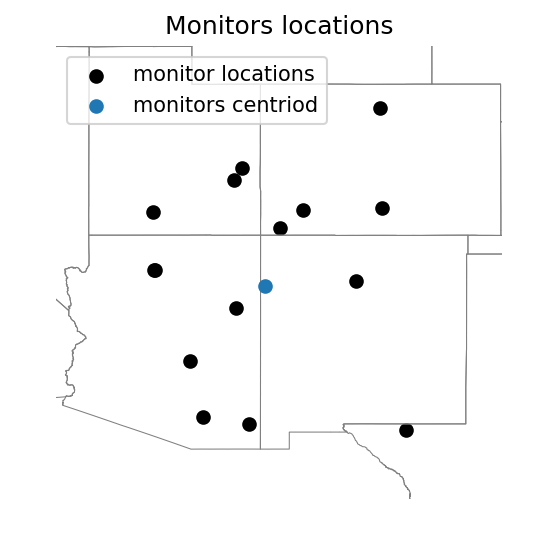

In [9]:
plt.figure(dpi=150)
ax1 = plt.subplot(111)
plt.scatter(sites_data.Longitude, sites_data.Latitude, c="k", label="monitor locations")
usa.plot(ax=ax1, facecolor='none', edgecolor="gray", linewidth=0.5)
ax1.set_xlim(lon_range)
ax1.set_ylim(lat_range)
ax1.axis('off')
plt.title("Monitors locations")

plt.scatter(FEf_data.Longitude.mean(), FEf_data.Latitude.mean(), label='monitors centriod')
plt.legend(loc='best')

ax1.set_aspect(1.1)
plt.show()

Figure out how to express Iran as dust basaed on metrics specified in the paper : "fine dust was assumed to be 3.5% Fe based on crustal abundances [Taylor and McLennan, 1985]"

$$Fe=\frac{3.5}{100}dust$$

$$dust=Fe\frac{100}{3.5}=Fe\times 28.57142$$

In [10]:
Fe_to_dust = 100./3.5
Fe_to_dust

28.571428571428573

In [11]:
print("mean dust conc all data %f " %(FEf_data.Value.mean()*Fe_to_dust) )

mean dust conc all data 1.382322 


TODO: Consider additional spatial cuttoffs here. Might want to limit this to "SW" and use the same definition as Hand et al 2016. 
- "Regionally aggregated concentrations and trends were computed for long-term (LT) sites operating continuously over the 20year time period in the SW region, defined here to include sites in Utah, Colorado, Arizona, New Mexico, and southwestern Texas". [Table S1](https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2016GL068519&file=grl54316-sup-0001-SuppInfo.pdf) with sites used for SW in that study

In [12]:
# Add a month and year column but first you need a DateTime object
FEf_data.loc[:,"DateTime"] = pd.to_datetime(FEf_data.loc[:,"DateTime"])

In [13]:
FEf_data["month"] = FEf_data.loc[:,"DateTime"].dt.month
FEf_data["year"] = FEf_data.loc[:, "DateTime"].dt.year

In [14]:
# group by month and take the mean
numeric_data = FEf_data[["month", "year", "Value", "Latitude", "Longitude"]].copy()
numeric_data.iloc[:4,:]

,month,year,Value,Latitude,Longitude
0,2,1988,0.00970,38.7833,-109.5833
1,5,1988,0.04191,38.7833,-109.5833
2,9,1988,0.02090,38.7833,-109.5833
3,12,1988,0.01576,38.7833,-109.5833


In [15]:
monthly_data = numeric_data.groupby(['month']).mean()

In [16]:
monthly_data.head()

,year,Value,Latitude,Longitude
month,,,,
1,2003.751156,0.029205,35.650008,-108.915458
2,2003.682285,0.036506,35.643975,-108.909668
3,2003.654232,0.055970,35.652242,-108.918489
4,2003.283903,0.083752,35.656289,-108.935994
5,2003.523715,0.071703,35.641848,-108.915731


Create a yearly dataframe that takes the mean of the months of interest 3-7 of the monthly_data

In [17]:
yearly_data = numeric_data.groupby(['year', 'month']).mean()
yearly_data.head()

Value   Latitude   Longitude
year month                                 
1988 1      0.044700  36.083373 -108.684887
     2      0.028073  36.142423 -108.743621
     3      0.049210  36.102321 -108.706173
     4      0.070691  36.253510 -108.808125
     5      0.058587  36.346831 -108.566433

In [18]:
yearly_data.loc[(slice(None), dust_season), :].head()

Value   Latitude   Longitude
year month                                 
1988 3      0.049210  36.102321 -108.706173
     4      0.070691  36.253510 -108.808125
     5      0.058587  36.346831 -108.566433
     6      0.045330  35.899974 -108.866881
     7      0.051376  35.978213 -108.782157

In [19]:
yearly_data.loc[(1988, dust_season), :].Value

year  month
1988  3        0.049210
      4        0.070691
      5        0.058587
      6        0.045330
      7        0.051376
Name: Value, dtype: float64

In [20]:
np.mean(yearly_data.loc[(1988, dust_season), :].Value)

0.05503891017666425

Create a dataframe for the dust season, averaging the months of interest, for each year. 

In [21]:
dust_season_data = yearly_data.loc[(slice(None), dust_season), :].groupby(["year"]).mean().copy()
dust_season_data

,Value,Latitude,Longitude
year,,,
1988,0.055039,36.116170,-108.745954
1989,0.066261,36.175822,-108.788190
1990,0.057530,36.021054,-109.017982
1991,0.056644,35.756067,-109.254996
1992,0.038111,35.627452,-109.111980
1993,0.042869,35.574937,-109.212658
1994,0.059453,35.873914,-109.199082
1995,0.051061,35.750174,-109.082482
1996,0.064386,35.737735,-109.036569


In [22]:
min_year = dust_season_data.index.values.min()
max_year = dust_season_data.index.values.max()
print(min_year)
print(max_year)

1988
2018


### Manuscript Figure 2

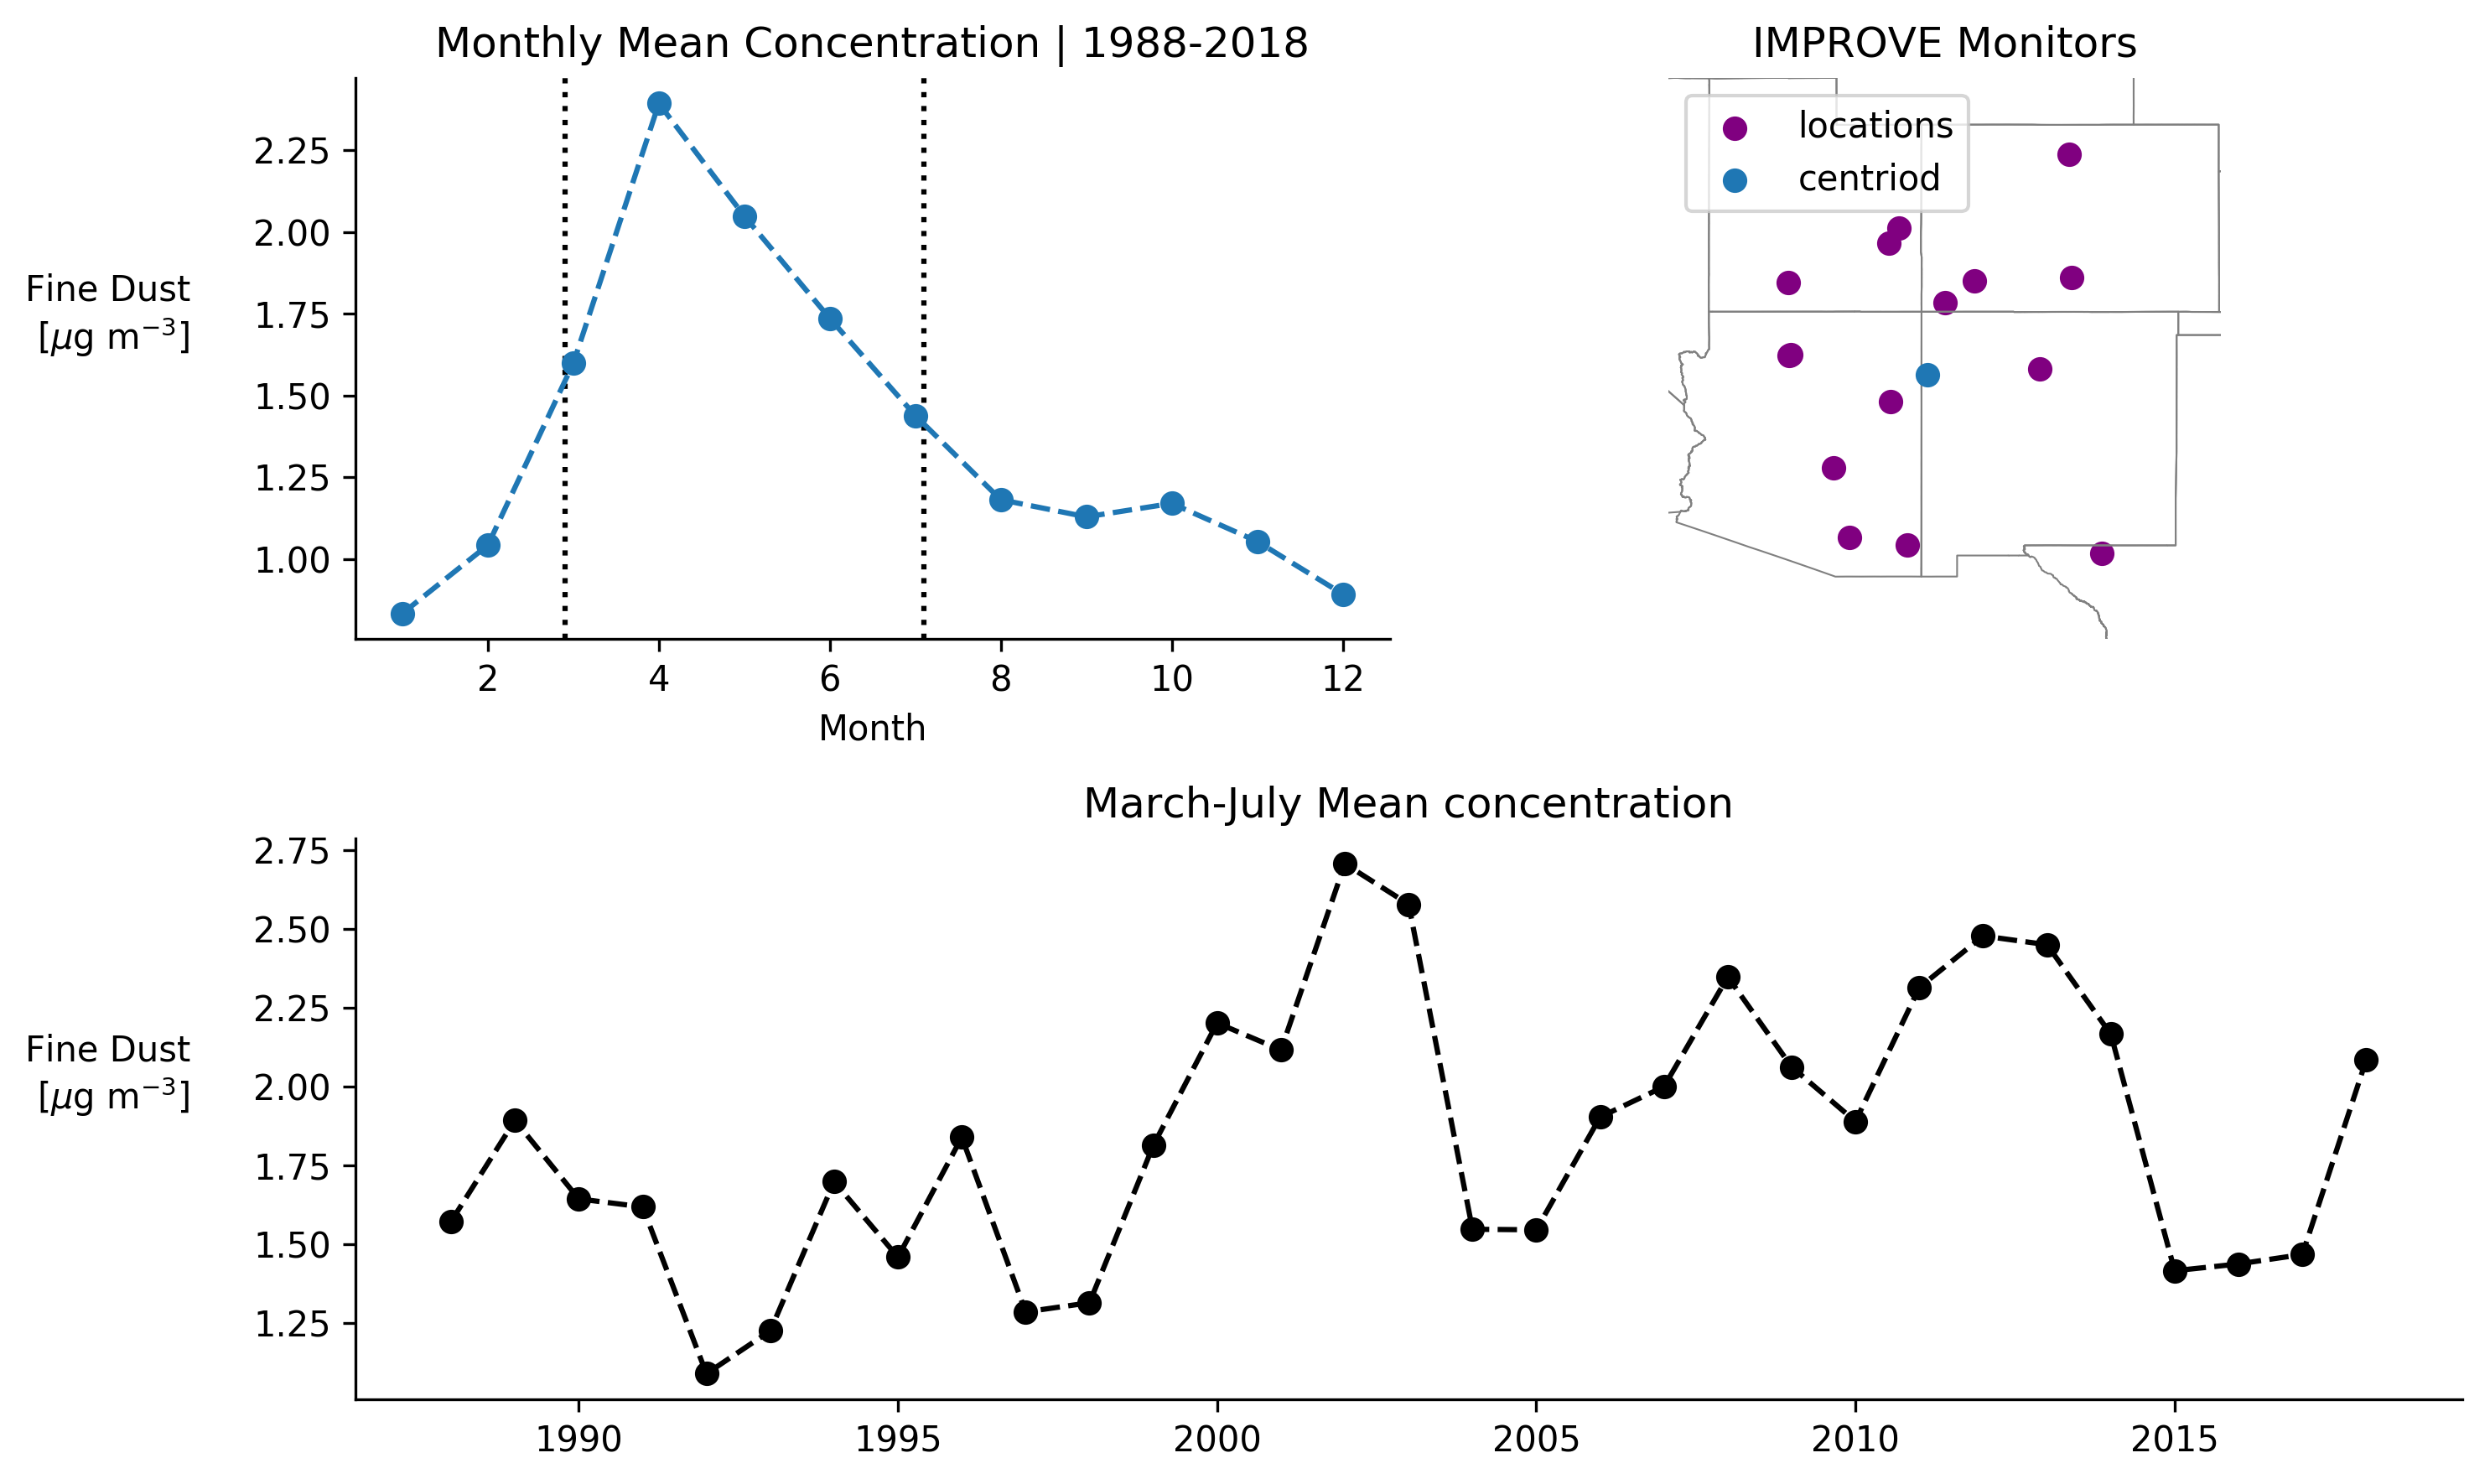

In [23]:
fig=plt.figure(dpi=300, figsize=(10,6))

gs=GridSpec(2,2) # 2 rows, 2 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column

plt.plot(monthly_data.index, (monthly_data.Value*Fe_to_dust),"--o", label="fine dust")
#plt.plot(monthly_data.index, monthly_data.Value, "--o", label="Fe")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.ylabel("Fine Dust \n[$\mu$g m$^{-3}$]", rotation=0, labelpad=40)
plt.xlabel("Month")
plt.title("Monthly Mean Concentration | " + str(min_year) + "-" + str(max_year) )
#plt.legend(loc="best")

plt.axvline(x=2.9, c="k", linestyle=":", zorder=0)
plt.axvline(x=7.1, c="k", linestyle=":", zorder=0)

ax2=fig.add_subplot(gs[0,1]) # First row, second column
plt.scatter(sites_data.Longitude, sites_data.Latitude, c="purple", label="locations")
usa.plot(ax=ax2, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(lon_range)
ax2.set_ylim(lat_range)
ax2.axis('off')
plt.title("IMPROVE Monitors")

plt.scatter(monthly_data.Longitude.mean(), monthly_data.Latitude.mean(), label='centriod')
plt.legend()
ax2.set_aspect(1.1)

ax3=fig.add_subplot(gs[1,:]) # Second row, span all columns
plt.plot(dust_season_data.index, dust_season_data.Value*Fe_to_dust, "--o", c="k")
plt.title("March-July Mean concentration")
ax3.spines["top"].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.ylabel("Fine Dust \n[$\mu$g m$^{-3}$]", rotation=0, labelpad=40)

# bring plots closer together
plt.subplots_adjust(wspace=0, hspace=0.3)
plt.tight_layout()
plt.savefig(os.path.join(improve_dir, "SW_dust_summary_figure.png"))
plt.show()

- clear seasonality (top-left), not such a clear interannual signal when looking at all months averaged (bottom)
- April has the highest concentrations by a bit, followed by May, June, July, then March. Why so much work focussed on March then? Just because of a trend? 

### Save the dataframes where the data are organized by month and by year

In [24]:
monthly_data.to_csv( os.path.join(improve_dir, "Fe_monthly_means.csv") )

In [25]:
dust_season_data.to_csv( os.path.join(improve_dir, "Fe_seasonal_means.csv") )

In [26]:
# Create grouped dataframe with a multiindex 
df_ = numeric_data.groupby(["year", "month"]).mean()
df_.head()

Value   Latitude   Longitude
year month                                 
1988 1      0.044700  36.083373 -108.684887
     2      0.028073  36.142423 -108.743621
     3      0.049210  36.102321 -108.706173
     4      0.070691  36.253510 -108.808125
     5      0.058587  36.346831 -108.566433

In [27]:
# This is how you get a single value with a multiindex 
df_.loc[(1988,3)]

Value          0.049210
Latitude      36.102321
Longitude   -108.706173
Name: (1988, 3), dtype: float64

In [28]:
# df_.loc[(slice(None), slice(None)), :] # to get all

In [29]:
years = np.unique(df_.index.get_level_values('year').values)
months = np.unique(df_.index.get_level_values('month').values)
print(np.unique(years))
print(np.unique(months))

[1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


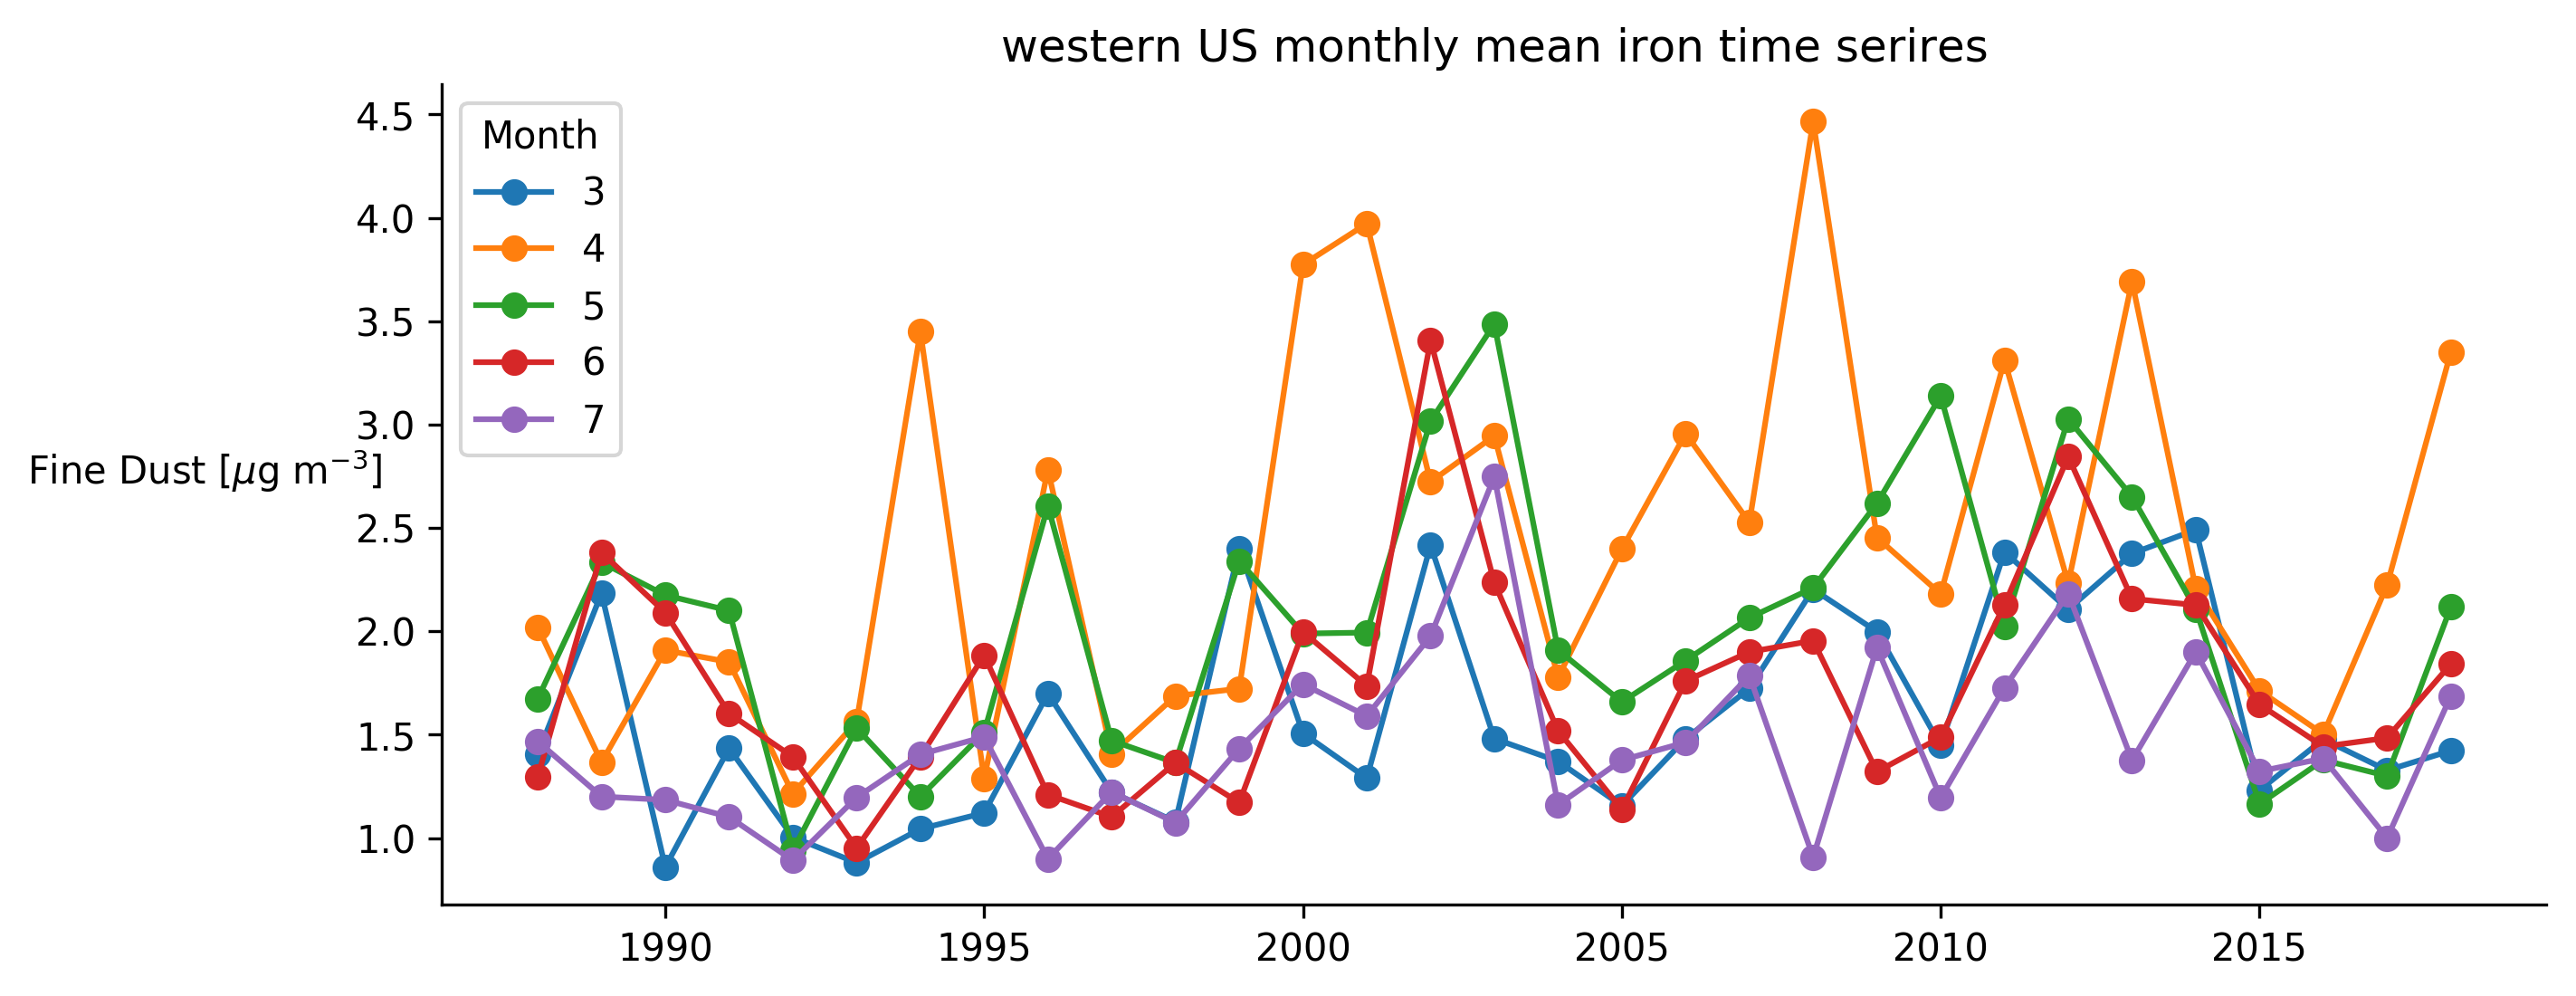

In [30]:
# Plot each months time series 
fig = plt.figure(dpi=300, figsize=(10,4))
ax=plt.subplot(111)

for mon in [3,4,5,6,7] : 
    # Once month mean data at a time
    y = df_.loc[(slice(None), mon), "Value"] * Fe_to_dust
    ax.plot(years, y, "-o", label=mon)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)   

plt.ylabel("Fine Dust [$\mu$g m$^{-3}$]", rotation=0, labelpad=40)
plt.title("western US monthly mean iron time serires")

# Mean of the bunch, choosing level year,
#df_.loc[(slice(None), [3,4,5,6] ), :].groupby(level=['year']).mean().Value.plot(label="3-6 mean", linewidth=3)

plt.legend(title="Month")


plt.show()

Just as seen in Hand et al 2016
- April has the highest concentrations
- March has an upward trend, though not completely obvious by looking at the time series. To me it looks like the year to year and ~4 year cycles are the bigger story. This is good news for our goal of trying to predict year to year dust concentrations. 

**TODO: Next create a four panel figure that shows each stations monthly mean concetration for this time period. I want to see if there is a spatial patter and or set of monitors that dominate these time series.**

In [31]:
df_.loc[(slice(None), [3,4,5] ), :].head()

Value   Latitude   Longitude
year month                                 
1988 3      0.049210  36.102321 -108.706173
     4      0.070691  36.253510 -108.808125
     5      0.058587  36.346831 -108.566433
1989 3      0.076435  36.140404 -108.785931
     4      0.047830  36.355511 -108.752057

In [32]:
# e.g. yearly slice mean values for specified month levels. 
df_.loc[(slice(None), [3,4,5] ), :].groupby(level=['year']).mean().Value[:5]

year
1988    0.059496
1989    0.068648
1990    0.057669
1991    0.062845
1992    0.036864
Name: Value, dtype: float64

In [33]:
# In words, feature_subset are the columns of data that I want an average of
# to be grouped by SiteCode and Month. I want to take the mean of these two
# levels of organization, i.e. for a given site code and month, what is the mean? 
feature_subset = [ "Value",'POC','Latitude', 'Longitude' ,"SiteCode", "month"]
site_monthly = data.loc[:,feature_subset].groupby(["SiteCode", "month"]).mean()
site_monthly.head()

NameError: name 'data' is not defined

In [ ]:
site_monthly.loc[("ARCH1", 1)]

## Plot the monthly mean values on a map

In [ ]:
fig = plt.figure(dpi=200, figsize=(9,8))

vmax = site_monthly.loc[(slice(None),[3,4,5,6]),: ].Value.max()
march = site_monthly.loc[(slice(None),3),: ]
april = site_monthly.loc[(slice(None),4),: ]
may   = site_monthly.loc[(slice(None),5),: ]
jun   = site_monthly.loc[(slice(None),6),: ]

ax1 = plt.subplot(221)
plt.scatter(march.Longitude, march.Latitude, c=march.Value, cmap="Reds", vmin=0, vmax=vmax)
usa.plot(ax=ax1, facecolor='none', edgecolor="gray", linewidth=0.5)

ax2 = plt.subplot(222)
plt.scatter(april.Longitude, april.Latitude, c=april.Value, cmap="Reds", vmin=0, vmax=vmax)
usa.plot(ax=ax2, facecolor='none', edgecolor="gray", linewidth=0.5)

ax3 = plt.subplot(223)
plt.scatter(may.Longitude, may.Latitude, c=may.Value, cmap="Reds", vmin=0, vmax=vmax)
usa.plot(ax=ax3, facecolor='none', edgecolor="gray", linewidth=0.5)

ax4 = plt.subplot(224)
plt.scatter(jun.Longitude, jun.Latitude, c=jun.Value, cmap="Reds", vmin=0, vmax=vmax)
usa.plot(ax=ax4, facecolor='none', edgecolor="gray", linewidth=0.5)

axes = [ax1,ax2,ax3,ax4]
titles = ["March", "April", "May", "June"]
for ax, title in zip(axes, titles) :
    ax.set_xlim(lon_range)
    ax.set_ylim(lat_range)
    ax.axis("off")
    ax.set_aspect(1.1)
    ax.set_title(title)
    
plt.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout()
#plt.colorbar()
plt.show()

- The stations with the highest concetrations are in the four corners states. 
    - TODO Subset analysis to these four nearly perfectly rectangle states
- It is VERY dusty in southern Arizona. Is that the whole signal? 

Make a contour plot of these irregularly spaced data